In [4]:
import numpy as np
import random

# Import Qiskit
from qiskit import QuantumCircuit, QuantumRegister, transpile
from qiskit_aer import AerSimulator
from qiskit_aer.quantum_info import AerStatevector

from qiskit.visualization import plot_histogram, plot_state_city
import qiskit.quantum_info as qi

In [5]:
simulator = AerSimulator()
simulator

AerSimulator('aer_simulator')

In [13]:
def random_quantum_circuit_basic() -> tuple[QuantumCircuit,int,int,int]:
    num_q = random.randint(3,5)
    num_a = random.randint(3,5)
    num_g = random.randint(5,10)
    
    in_q = QuantumRegister(num_q, name='cq')
    an_q = QuantumRegister(num_a, name='aq')
    
    circuit = QuantumCircuit(in_q, an_q)

    for i in range(num_q):
        circuit.h(in_q[i])
    
    for i in range(num_g):
        
        if random.random() < 0.75: # Input acts on Ancilla    
            control_q = in_q
            target_q = an_q

        else: # Ancilla acts on input
            control_q = an_q
            target_q = in_q

        num_controls = random.randint(1, control_q.size)
        controls = random.sample(range(control_q.size), num_controls)  # Get control qubit/s
        target = random.randrange(target_q.size) # Get target qubit
        print(num_controls, controls, target)
        circuit.mcx([control_q[cq] for cq in controls],target_q[target]) 

    print(f'Built circuit with {num_q} input, {num_a} ancilla and {num_g} gates.')
    return circuit, num_q, num_a, num_g

5 [0, 1, 2, 4, 3] 0
3 [4, 2, 0] 0
4 [2, 4, 1, 0] 0
2 [1, 0] 1
4 [1, 0, 4, 2] 2
4 [2, 1, 0, 4] 0
1 [4] 0
2 [2, 0] 3
5 [3, 1, 2, 0, 4] 0
1 [2] 3
Built circuit with 5 input, 3 ancilla and 10 gates.


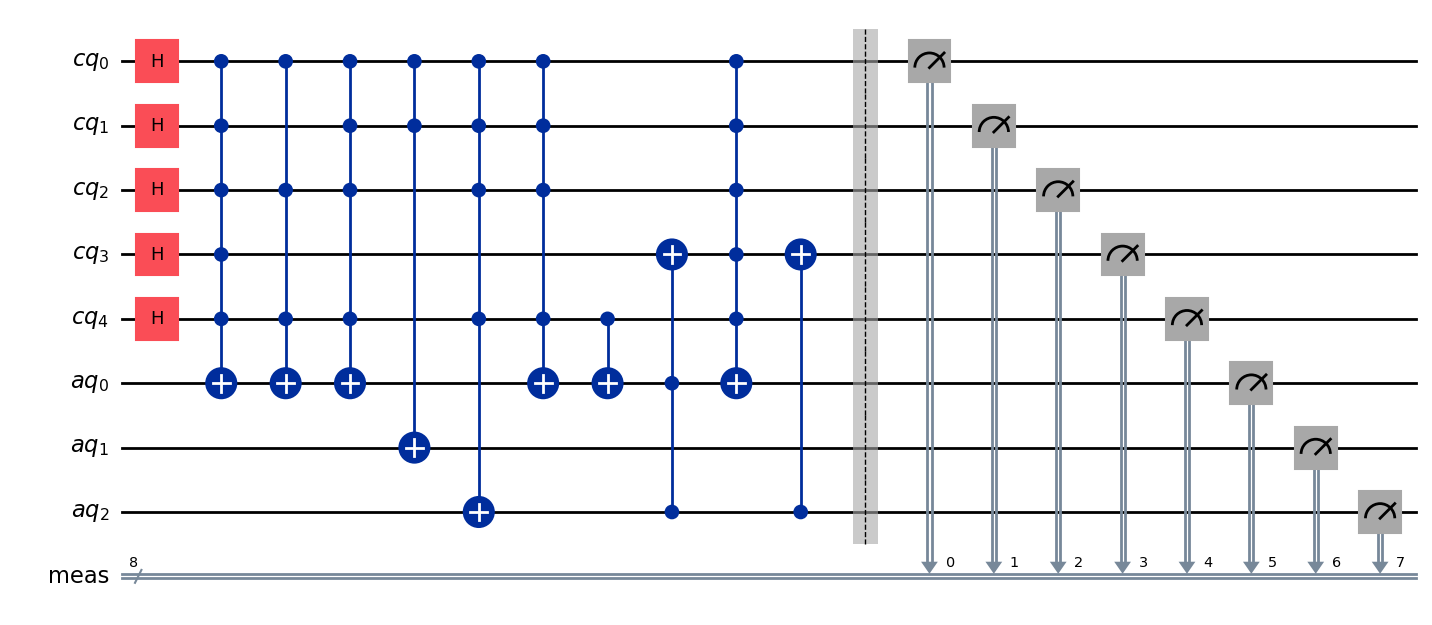

In [14]:
circuit, q, a, g = random_quantum_circuit_basic()
circuit.measure_all()
circuit.draw('mpl')

In [15]:
simulator = AerSimulator()
circ = transpile(circuit, simulator)

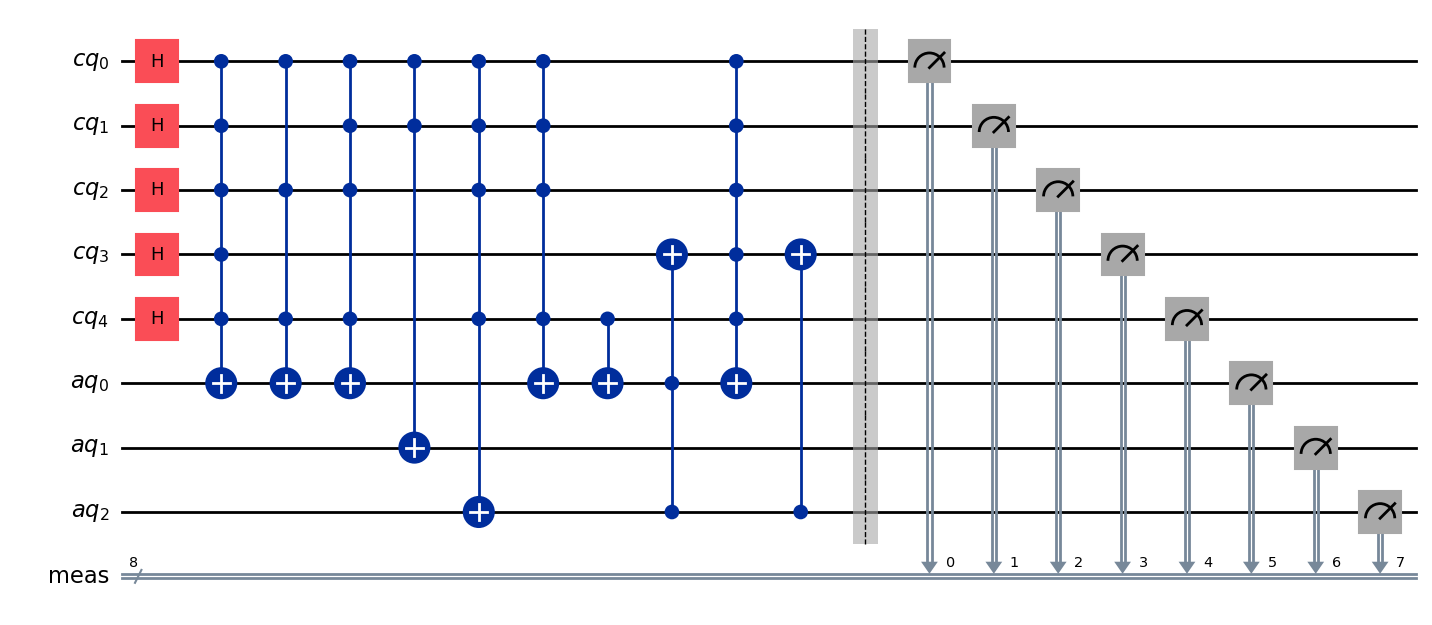

In [17]:
circ.draw('mpl')

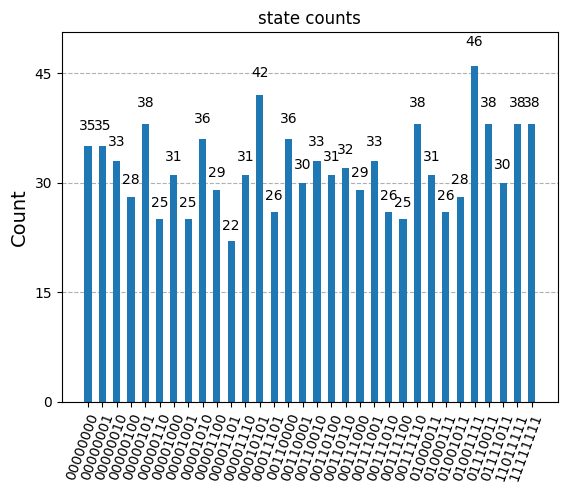

In [18]:
result = simulator.run(circ).result()
counts = result.get_counts(circ)
plot_histogram(counts, title='state counts')

In [22]:
sim_statevector = AerSimulator(method='statevector')
job_statevector = sim_statevector.run(circ)
job_statevector.result().data(0)

{'counts': {'0x32': 31,
  '0xff': 31,
  '0x0': 28,
  '0x38': 29,
  '0x31': 29,
  '0x4b': 34,
  '0x30': 27,
  '0xdf': 34,
  '0x7b': 31,
  '0x15': 42,
  '0x6': 36,
  '0x1': 32,
  '0x4f': 27,
  '0x3e': 34,
  '0xe': 24,
  '0x5': 32,
  '0x9': 38,
  '0x34': 31,
  '0x3a': 34,
  '0x1d': 25,
  '0x8': 34,
  '0xc': 35,
  '0x3c': 32,
  '0x47': 26,
  '0x43': 33,
  '0x73': 34,
  '0x39': 40,
  '0x36': 31,
  '0x2': 33,
  '0x4': 31,
  '0xa': 32,
  '0xd': 34}}

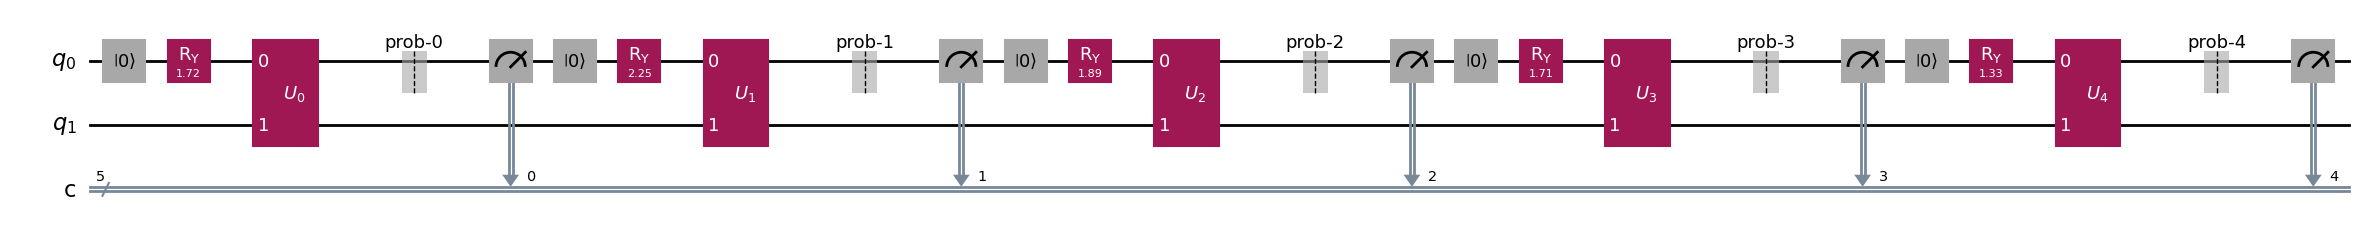

In [23]:
from qiskit import QuantumCircuit, transpile
from qiskit.quantum_info import random_unitary
from qiskit_aer import AerSimulator

import numpy as np

ROUNDS = 5
np.random.seed(0)
x = np.random.uniform(low=0, high=np.pi, size=(ROUNDS,))

circ = QuantumCircuit(2, ROUNDS)
for m in range(ROUNDS):
    circ.reset(0)
    circ.ry(x[m], 0)
    circ.unitary(random_unitary(4, seed = m), [0, 1], label = '  $U_' + str(m) + '$  ')
    circ.save_probabilities([0], label='prob-' + str(m)) # <== here
    circ.measure(0, m)

circ.draw('mpl', fold = -1)

In [24]:
simulator = AerSimulator()
tr_circ = transpile(circ)
job = simulator.run(tr_circ)
sim_data = job.result().data()
for m in range(ROUNDS):
    print('Probabilities {}: {}'.format(m, sim_data['prob-' + str(m)]))

Probabilities 0: [0.49643119 0.50356881]
Probabilities 1: [0.40472164 0.59527836]
Probabilities 2: [0.20301727 0.79698273]
Probabilities 3: [0.56569145 0.43430855]
Probabilities 4: [0.28772292 0.71227708]
